In [1]:
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"

In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
iris_setosa<-iris[iris$Species=="setosa",] # 50
iris_versicolor <- iris[iris$Species=="versicolor",] # 50
iris_virginica <- iris[iris$Species=="virginica",] # 50
iris_train <- rbind(iris_setosa[1:25,],iris_versicolor[1:25,],iris_virginica[1:25,])
iris_test <- rbind(iris_setosa[26:50,],iris_versicolor[26:50,],iris_virginica[26:50,])

Warning message:
"package 'C50' was built under R version 3.6.3"

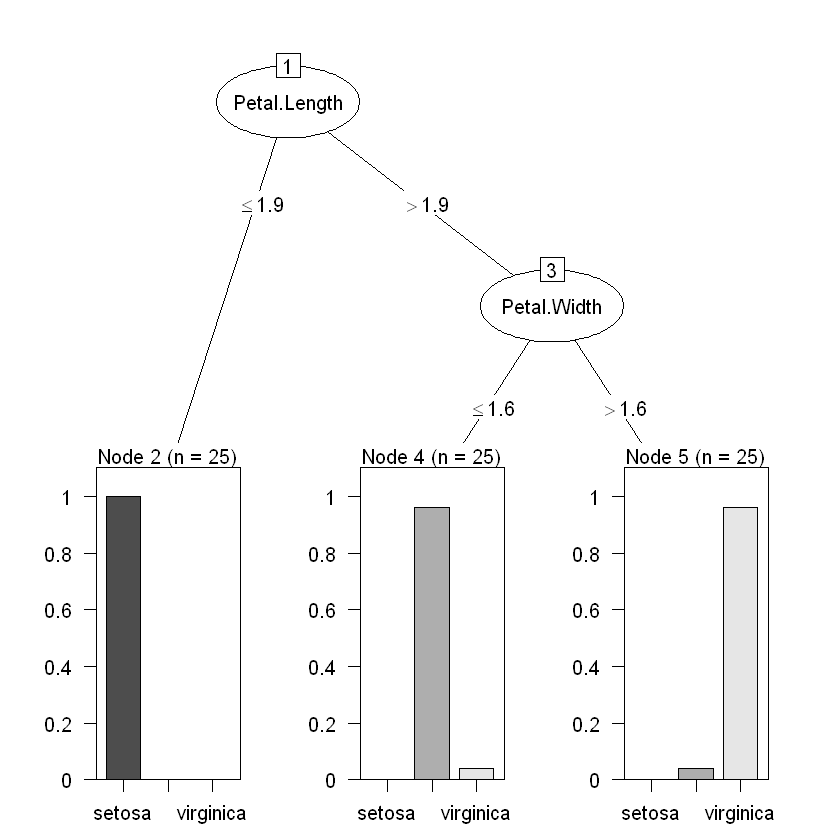

In [4]:
library(C50)
# Building model on training data 
irisc5.0_train <- C5.0(iris_train[,-5],iris_train$Species)
windows()
plot(irisc5.0_train) # Tree graph

In [5]:
# Training accuracy
pred_train <- predict(irisc5.0_train,iris_train)

mean(iris_train$Species==pred_train) # 97.33% Accuracy

[1] 0.9733333

In [6]:
library(caret)
confusionMatrix(pred_train,iris_train$Species)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         24         1
  virginica       0          1        24

Overall Statistics
                                         
               Accuracy : 0.9733         
                 95% CI : (0.907, 0.9968)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.96           
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.9600
Specificity                 1.0000            0.9800           0.9800
Pos Pred Value              1.0000            0.9600           0.9600
Neg Pred Value              1.0000            0.9800           0.9800
Prevalence

In [7]:
predc5.0_test <- predict(irisc5.0_train,newdata=iris_test) # predicting on test data
mean(predc5.0_test==iris_test$Species) # 94.66% accuracy 
confusionMatrix(predc5.0_test,iris_test$Species)

[1] 0.9466667

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         24         3
  virginica       0          1        22

Overall Statistics
                                         
               Accuracy : 0.9467         
                 95% CI : (0.869, 0.9853)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.92           
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.8800
Specificity                 1.0000            0.9400           0.9800
Pos Pred Value              1.0000            0.8889           0.9565
Neg Pred Value              1.0000            0.9792           0.9423
Prevalence

In [8]:
library(gmodels)
# Cross tablez
CrossTable(iris_test$Species,predc5.0_test)

Warning message:
"package 'gmodels' was built under R version 3.6.3"


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  75 

 
                  | predc5.0_test 
iris_test$Species |     setosa | versicolor |  virginica |  Row Total | 
------------------|------------|------------|------------|------------|
           setosa |         25 |          0 |          0 |         25 | 
                  |     33.333 |      9.000 |      7.667 |            | 
                  |      1.000 |      0.000 |      0.000 |      0.333 | 
                  |      1.000 |      0.000 |      0.000 |            | 
                  |      0.333 |      0.000 |      0.000 |            | 
------------------|------------|------------|------------|------------|
       versicolor |          0 |         24 |          1 |         25 | 
                  |      8.333 |     25.000 |      5.7

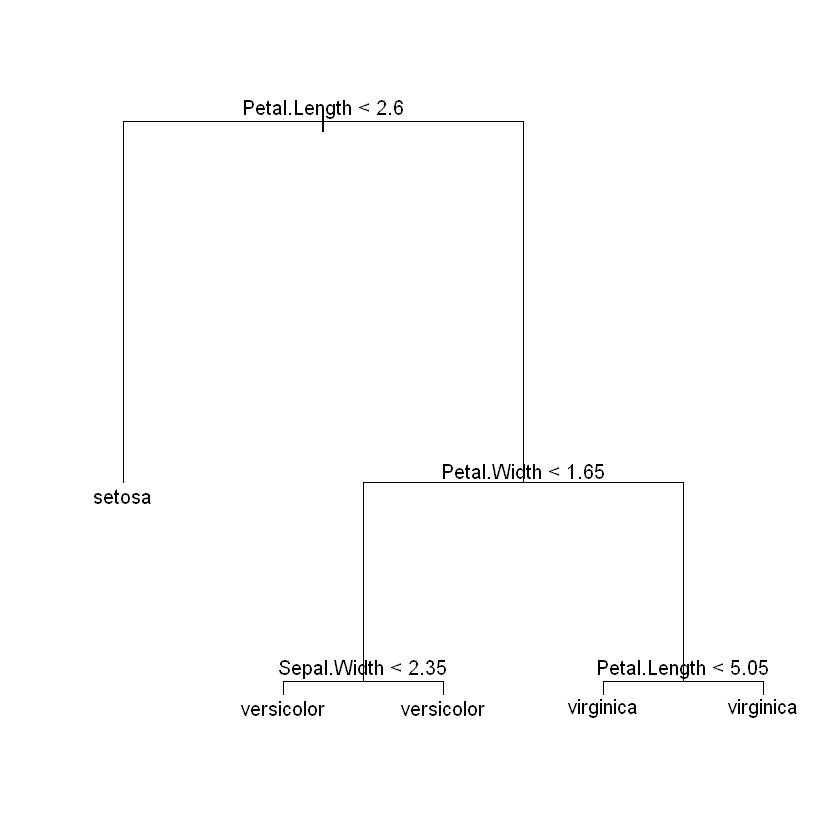

In [9]:
##### Using tree function 
library(tree)
# Building a model on training data 
iris_tree <- tree(Species~.,data=iris_train)
plot(iris_tree)
text(iris_tree,pretty = 0)

In [12]:
pred_tree <- as.data.frame(predict(iris_tree,newdata=iris_test))
pred_tree["final"] <- NULL
pred_test_df <- predict(iris_tree,newdata=iris_test)
for (i in 1:nrow(pred_tree)){
    pred_tree[i,"final"]<-ifelse(pred_tree[i,"setosa"]>0.5,"setosa",ifelse(pred_tree[i,"versicolor"]>0.5,"versicolor","virginica"))
 }

In [13]:
mean(pred_tree$final==iris_test$Species) # Accuracy = 94.66%
CrossTable(iris_test$Species,pred_tree$final)

[1] 0.9466667


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  75 

 
                  | pred_tree$final 
iris_test$Species |     setosa | versicolor |  virginica |  Row Total | 
------------------|------------|------------|------------|------------|
           setosa |         25 |          0 |          0 |         25 | 
                  |     33.333 |      9.000 |      7.667 |            | 
                  |      1.000 |      0.000 |      0.000 |      0.333 | 
                  |      1.000 |      0.000 |      0.000 |            | 
                  |      0.333 |      0.000 |      0.000 |            | 
------------------|------------|------------|------------|------------|
       versicolor |          0 |         24 |          1 |         25 | 
                  |      8.333 |     25.000 |      5